### Task: Determine the eligibility for granting a Home Loan
Objective of this notebook is:

1.   To understand the patterns in the data.
2.   How to Handle the categorical features.
3. How to deal with missing data.
4. Feature Engineering
5. Finding the most important features while taking the decision of granting a loan application.
6. Understanding the Normalization and standardisation of the data.

#### Load the data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Basic data exploration

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
## Drop unnecessary columns
data = data.drop('Loan_ID', axis=1)

In [7]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
## Applicant Income here is monthly
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data.describe(include = ['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [10]:
data["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
#missing values
data.isna().sum() #/ data.shape[0] * 100

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
## separeate categorical and numeric features.
# catgeorical and numerical columns
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols.remove('Loan_Status')
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [13]:
num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

#### Univariate Data Analysis

In [14]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

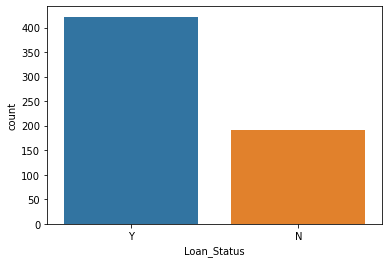

In [16]:
sns.countplot(data=data, x='Loan_Status')
plt.show()

In [17]:
target = 'Loan_Status'
data[target].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

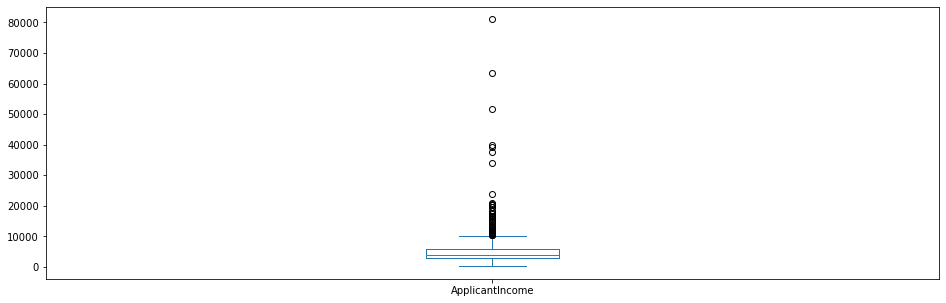

In [18]:
plt.figure()
data["ApplicantIncome"].plot.box(figsize=(16, 5))

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

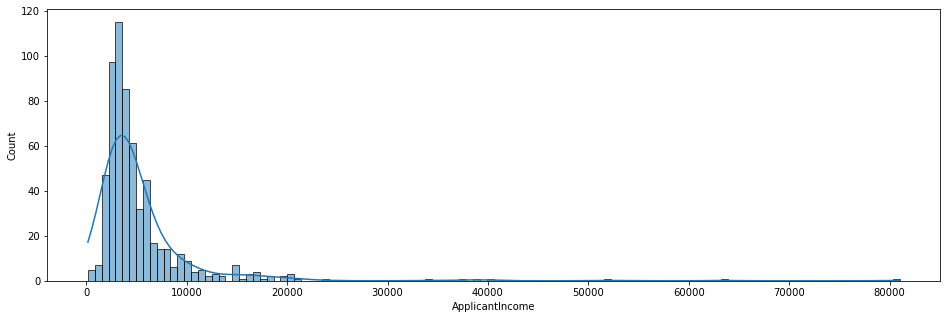

In [19]:
plt.figure(figsize=(16, 5))
sns.histplot(data["ApplicantIncome"], kde=True)

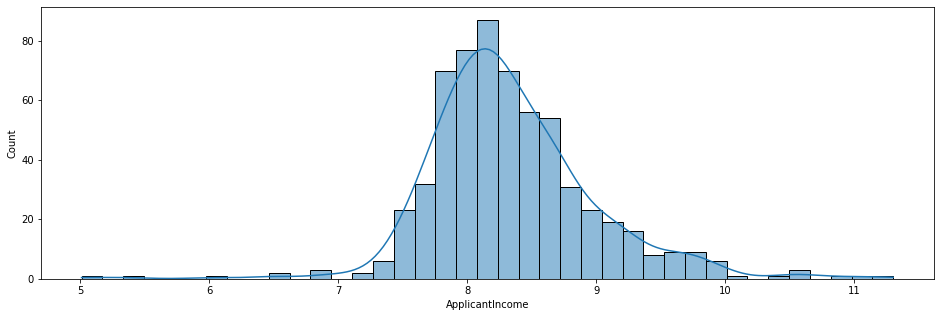

In [20]:
plt.figure(figsize=(16, 5))
sns.histplot(np.log(data["ApplicantIncome"]), kde=True)

plt.show()

<AxesSubplot:>

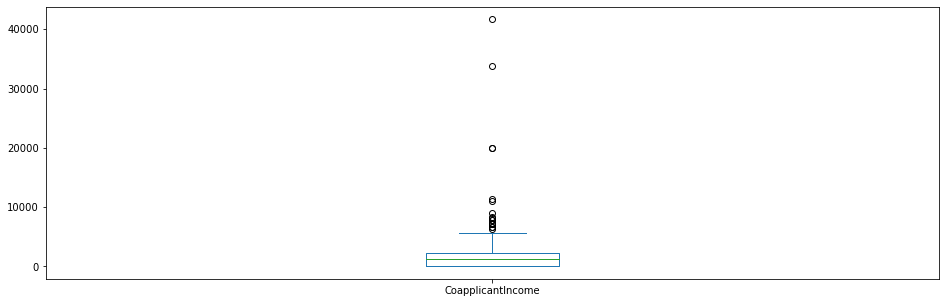

In [21]:
## CoapplicantIncome
plt.figure()
data["CoapplicantIncome"].plot.box(figsize=(16, 5))

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

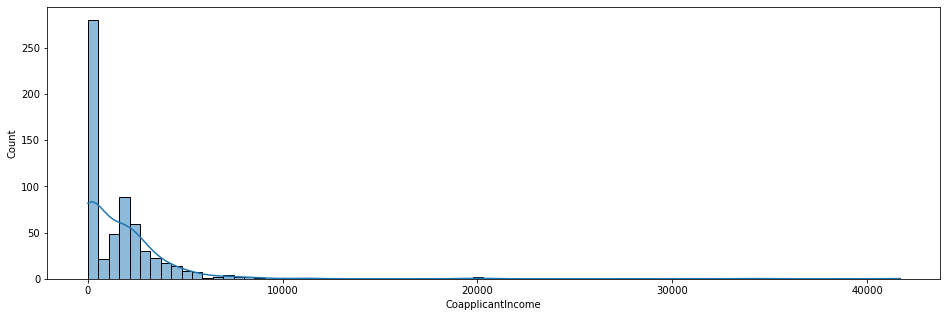

In [22]:
plt.figure(figsize=(16, 5))
sns.histplot(data["CoapplicantIncome"], kde=True)

In [23]:
data.groupby("Loan_Status").mean()['ApplicantIncome']

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

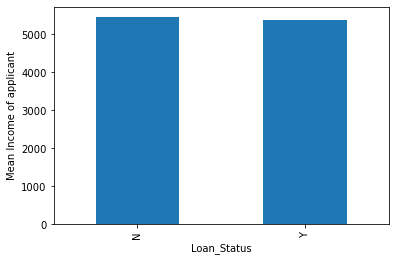

In [24]:
data.groupby("Loan_Status").mean()['ApplicantIncome'].plot.bar()
plt.ylabel("Mean Income of applicant")
plt.show()

In [25]:
## H0: mean1 = mean2
## Ha: mean1 != mean2
sample1 = data[data["Loan_Status"] == "Y"]["ApplicantIncome"]
sample2 = data[data["Loan_Status"] == "N"]["ApplicantIncome"]
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

In [26]:
## H0: Same distribution
## Ha: Different Distribution
stats.ks_2samp(sample1, sample2)

KstestResult(statistic=0.04393759873617693, pvalue=0.9480203334325084)

In [27]:
sample1.describe()

count      422.000000
mean      5384.068720
std       5765.441615
min        210.000000
25%       2877.500000
50%       3812.500000
75%       5771.500000
max      63337.000000
Name: ApplicantIncome, dtype: float64

In [28]:
sample2.describe()

count      192.000000
mean      5446.078125
std       6819.558528
min        150.000000
25%       2885.000000
50%       3833.500000
75%       5861.250000
max      81000.000000
Name: ApplicantIncome, dtype: float64

#### Bin Income

In [29]:
bins=[0,2500, 4000, 6000, 8000, 10000, 20000, 40000, 81000]
group=['Low','Average','medium', 'H1', 'h2', 'h3', 'h4' , 'Very high']

In [30]:
data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group)

In [31]:
pd.crosstab(data["Income_bin"],data["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Income_bin,,,
Low,34,74,108
Average,67,159,226
medium,45,98,143
H1,20,34,54
h2,9,22,31
h3,13,27,40
h4,3,6,9
Very high,1,2,3
All,192,422,614


In [32]:
## H0: Variables are independent
## Ha: Variables are dependent
val = pd.crosstab(index=data["Income_bin"], columns=data["Loan_Status"]).values
stats.chi2_contingency(val) # chi_stat, p_value, df, expected_values

(1.2420001711303135,
 0.9899274842922701,
 7,
 array([[ 33.77198697,  74.22801303],
        [ 70.67100977, 155.32899023],
        [ 44.71661238,  98.28338762],
        [ 16.88599349,  37.11400651],
        [  9.69381107,  21.30618893],
        [ 12.50814332,  27.49185668],
        [  2.81433225,   6.18566775],
        [  0.93811075,   2.06188925]]))

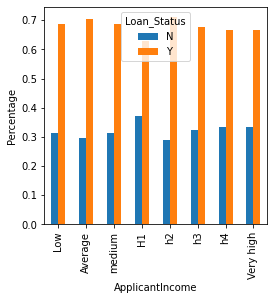

In [33]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])

Income_bin.div(Income_bin.sum(axis=1),axis=0).plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [34]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,6000.0


In [35]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [36]:
vals = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])
vals

Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


In [37]:
## H0: Variables are independent
## Ha: Variables are dependent
stats.chi2_contingency(vals) # chi_stat, p-value, dof, expec

(3.428480885250809,
 0.3301570564076713,
 3,
 array([[ 14.6970684 ,  32.3029316 ],
        [ 69.73289902, 153.26710098],
        [ 66.29315961, 145.70684039],
        [ 41.27687296,  90.72312704]]))

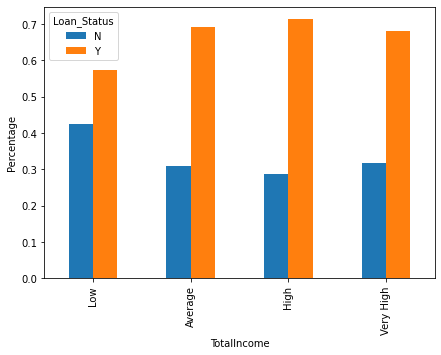

In [38]:
TotalIncome = pd.crosstab(data["TotalIncome_bin"],data["Loan_Status"])
TotalIncome.div(TotalIncome.sum(axis = 1),axis=0).plot(kind='bar', figsize=(7,5))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

#### Loan Amount and Loan Term

In [39]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [40]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')

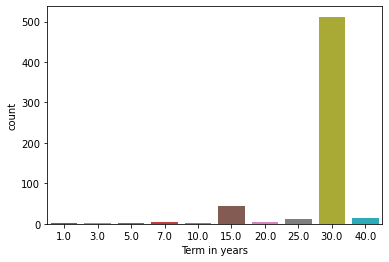

In [41]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

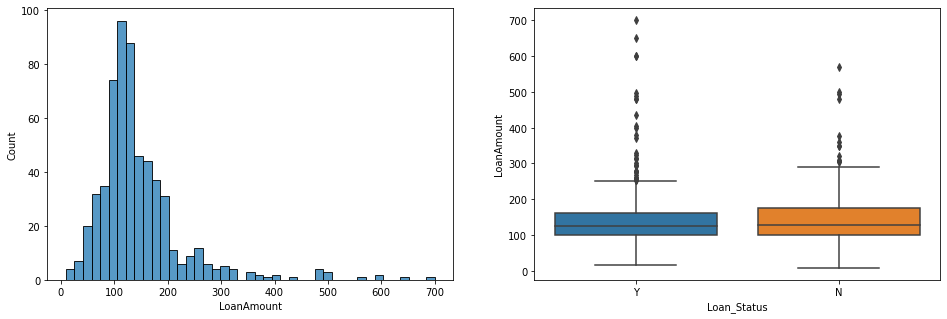

In [42]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

#### Homework
Think of ability to pay EMI as a feature, and come up with the right feature engineering to get a better relation with target (Loan Status)

Use loan amount, loan term, income, guess expense, finally ability to pay EMI.

In [43]:
data['Loan_Amount_per_year']  = data['LoanAmount']/data['Loan_Amount_Term']

In [44]:
data['EMI'] = data['Loan_Amount_per_year']*1000/12

In [45]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000,391.666667


Is EMI < 30% of the income?

In [46]:
data['Able_to_pay_EMI'] = (data['TotalIncome']*0.3 > data['EMI']).astype('int')

In [47]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000,391.666667,1


<AxesSubplot:xlabel='Able_to_pay_EMI', ylabel='count'>

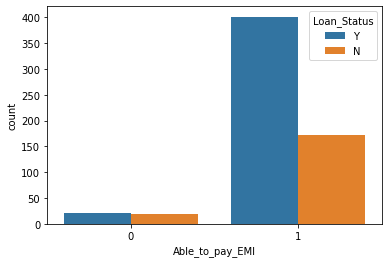

In [48]:
sns.countplot(x='Able_to_pay_EMI', data = data, hue = 'Loan_Status')

In [49]:
pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status'])

Loan_Status,N,Y
Able_to_pay_EMI,,
0,19,21
1,173,401


In [50]:
# H0: No dependency
# Ha: Categorical variables are dependent
# chi_stat, p-value, dof, expected
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status']))

(4.467271867611989,
 0.03455011506195388,
 1,
 array([[ 12.50814332,  27.49185668],
        [179.49185668, 394.50814332]]))

### Conclusion: Ability to pay EMI seems like a good feature to predict loan status

### Credit History vs. Loan Status

In [51]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

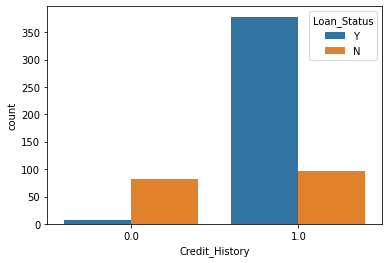

In [52]:
sns.countplot(data = data, x = 'Credit_History', hue = 'Loan_Status')

In [53]:
pd.crosstab(data['Credit_History'], data['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [54]:
# chi_stat, p-value, dof, expected
chi2_contingency(pd.crosstab(data['Credit_History'], data['Loan_Status']))

(174.63729658142535,
 7.184759548750746e-40,
 1,
 array([[ 28.2464539,  60.7535461],
        [150.7535461, 324.2464539]]))

### Dependents vs. Loan status

In [55]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

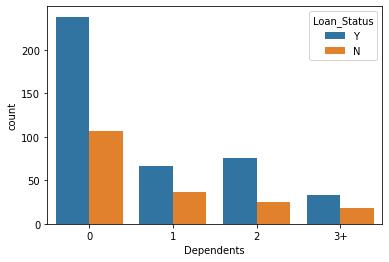

In [56]:
sns.countplot(data = data, x = 'Dependents', hue = 'Loan_Status')

In [57]:
pd.crosstab(data['Dependents'], data['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [58]:
# chi_stat, p-value, dof, expected
chi2_contingency(pd.crosstab(data['Dependents'], data['Loan_Status']))

(3.158339770698263,
 0.3678506740863211,
 3,
 array([[107.12854758, 237.87145242],
        [ 31.67278798,  70.32721202],
        [ 31.36227045,  69.63772955],
        [ 15.83639399,  35.16360601]]))

## Missing Values

In [59]:
data.isna().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
Property_Area            0
Loan_Status              0
Income_bin               0
TotalIncome              0
TotalIncome_bin          0
Loan_Amount_per_year    36
EMI                     36
Able_to_pay_EMI          0
dtype: int64

In [60]:
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [61]:
missing_df = missing_to_df(data)
missing_df[missing_df['Total'] > 0]

,Total,Percent
Credit_History,50,8.143322
EMI,36,5.863192
Loan_Amount_per_year,36,5.863192
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599


In [62]:
data['Credit_History'] = data['Credit_History'].fillna(2,)

In [63]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
2.0     50
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

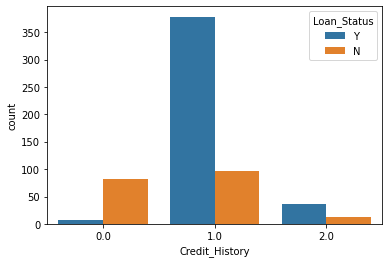

In [64]:
sns.countplot(data = data, x = 'Credit_History', hue = 'Loan_Status')

In [65]:
# chi_stat, p-value, dof, expected
chi2_contingency(pd.crosstab(data['Credit_History'], data['Loan_Status']))

(180.0664689309774,
 7.926164541543543e-40,
 2,
 array([[ 27.83061889,  61.16938111],
        [148.53420195, 326.46579805],
        [ 15.63517915,  34.36482085]]))

## Filling in missing values - Imputation

In [66]:
from sklearn.impute import SimpleImputer

In [67]:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])

In [68]:
a.mean()

0    20.0
dtype: float64

In [69]:
SimpleImputer(strategy="mean").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [20.],
       [50.]])

In [70]:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])
a.median()

0    10.0
dtype: float64

In [71]:
SimpleImputer(strategy="median").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

In [72]:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])
a.mode()

,0
0,10.0


In [73]:
SimpleImputer(strategy="most_frequent").fit_transform(a)

array([[10.],
       [10.],
       [20.],
       [10.],
       [30.],
       [10.],
       [10.],
       [50.]])

In [74]:
a = pd.DataFrame([10, 10, 20, 10, 30, 10, np.nan, 50])
SimpleImputer(strategy="constant", fill_value=100).fit_transform(a)

array([[ 10.],
       [ 10.],
       [ 20.],
       [ 10.],
       [ 30.],
       [ 10.],
       [100.],
       [ 50.]])

## Imputation on Loan Data

In [75]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [76]:
median_imputer = SimpleImputer(strategy = 'median')
for col in num_cols:
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [77]:
data.isna().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
Income_bin               0
TotalIncome              0
TotalIncome_bin          0
Loan_Amount_per_year    36
EMI                     36
Able_to_pay_EMI          0
dtype: int64

In [78]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [79]:
mode_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_cols:
    data[col] = pd.DataFrame(mode_imputer.fit_transform(pd.DataFrame(data[col])))

In [80]:
data.isna().sum()

Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
Income_bin               0
TotalIncome              0
TotalIncome_bin          0
Loan_Amount_per_year    36
EMI                     36
Able_to_pay_EMI          0
dtype: int64

## Categorical Encoding

LabelEncoder - Convert categories to numeric values

TargetEncoder

In [81]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
label_encoder = LabelEncoder()
col='Loan_Status'
data[col] = label_encoder.fit_transform(data[col])

In [84]:
data[col].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [85]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [86]:
label_encoder = LabelEncoder()
col='Gender'
data[col] = label_encoder.fit_transform(data[col])

In [87]:
data['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [88]:
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [89]:
label_encoder = LabelEncoder()
col='Married'
data[col] = label_encoder.fit_transform(data[col])

In [90]:
data['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

## TargetEncoder

In [91]:
col='Property_Area'
data[col].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [92]:
data.groupby(col).agg({"Loan_Status": np.mean}) # since loan_status is 1's and 0's, mean gives fraction which are ones

,Loan_Status
Property_Area,
Rural,0.614525
Semiurban,0.768240
Urban,0.658416


In [93]:
#!pip install category_encoders # - Run this if you don't have category_encoders

In [94]:
from category_encoders import TargetEncoder

In [95]:
te = TargetEncoder()
data[col] = te.fit_transform(data[col], data['Loan_Status'])

In [96]:
col='Property_Area'
data[col].value_counts()

0.768240    233
0.658416    202
0.614525    179
Name: Property_Area, dtype: int64

In [97]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,1,0,0,Graduate,No,5849.0,0.0,128.0,30.0,1.0,0.658416,1,medium,5849.0,High,NaN,NaN,0
1,1,1,1,Graduate,No,4583.0,1508.0,128.0,30.0,1.0,0.614525,0,medium,6091.0,High,4.266667,355.555556,1
2,1,1,0,Graduate,Yes,3000.0,0.0,66.0,30.0,1.0,0.658416,1,Average,3000.0,Low,2.200000,183.333333,1
3,1,1,0,Not Graduate,No,2583.0,2358.0,120.0,30.0,1.0,0.658416,1,Average,4941.0,Average,4.000000,333.333333,1
4,1,0,0,Graduate,No,6000.0,0.0,141.0,30.0,1.0,0.658416,1,medium,6000.0,High,4.700000,391.666667,1


In [98]:
help(TargetEncoder)

Help on class TargetEncoder in module category_encoders.target_encoder:

class TargetEncoder(category_encoders.utils.BaseEncoder, category_encoders.utils.SupervisedTransformerMixin)
 |  TargetEncoder(verbose=0, cols=None, drop_invariant=False, return_df=True, handle_missing='value', handle_unknown='value', min_samples_leaf=20, smoothing=10, hierarchy=None)
 |  
 |  Target encoding for categorical features.
 |  
 |  Supported targets: binomial and continuous. For polynomial target support, see PolynomialWrapper.
 |  
 |  For the case of categorical target: features are replaced with a blend of posterior probability of the target
 |  given particular categorical value and the prior probability of the target over all the training data.
 |  
 |  For the case of continuous target: features are replaced with a blend of the expected value of the target
 |  given particular categorical value and the expected value of the target over all the training data.
 |  
 |  Parameters
 |  ----------
 | 

In [99]:
label_encoder = LabelEncoder()
col='Dependents'
data[col] = label_encoder.fit_transform(data[col])

In [100]:
data[col].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

<AxesSubplot:>

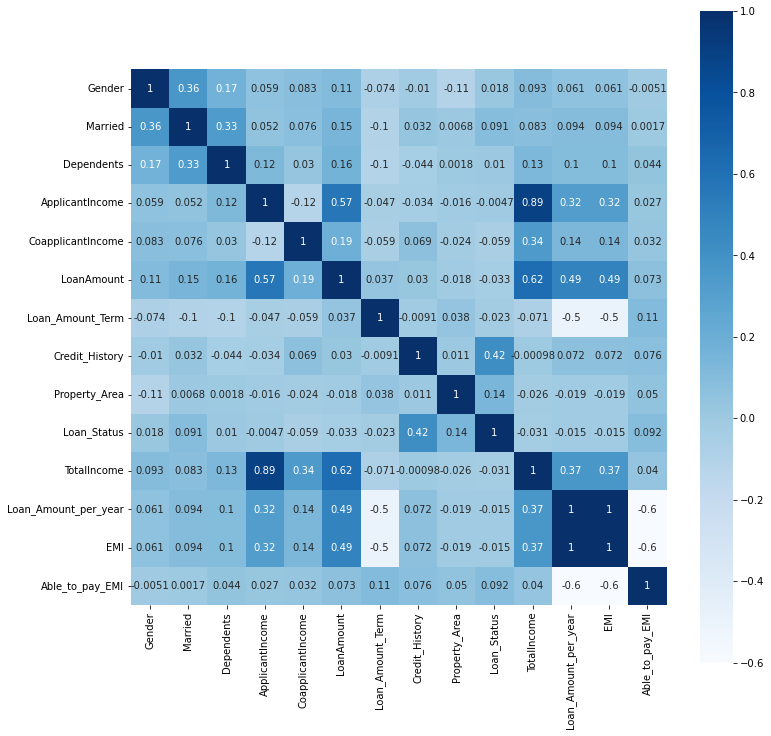

In [101]:
#PCC
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(method='pearson'), square=True,annot=True, cmap="Blues")

## Trying dependents as categorical - doubt session

In [102]:
data=pd.read_csv("loan.csv")
label_encoder = LabelEncoder()
col='Dependents'
data[col] = label_encoder.fit_transform(data[col])

data["Dependents_bin"] = (data["Dependents"] == 0).astype(str)

In [103]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,True
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,False
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,True
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,True
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,True


In [104]:
val = pd.crosstab(index=data["Dependents_bin"], columns=data["Loan_Status"]).values
stats.chi2_contingency(val) # chi_stat, p_value, df, expected_values

(0.004509402911947605,
 0.9464606272778516,
 1,
 array([[ 84.11726384, 184.88273616],
        [107.88273616, 237.11726384]]))

In [105]:
val = pd.crosstab(index=data["Dependents_bin"], columns=data["Loan_Status"]).values
val

array([[ 85, 184],
       [107, 238]])